## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Feature Extraction (PCA) / Component Selection (16)
## --> 4. Data Cleaning (Removing 0 class) 
## --> 5. Normalization (Z Score Normalization)
## --> 6. Train Test Splitting (70% Train , 30% Test)
## --> 7. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 8. Find Training Accuracy
## --> 9. Testing Accuracy

# 1. Load Dataset

### Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### read .lan file

In [2]:
#import the package
from spectral import *

In [3]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')

In [4]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [5]:
data.shape

(145, 145, 220)

In [6]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [7]:
ground_truth_data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)

In [8]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [9]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [10]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [11]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [12]:
ground_truth_data.shape

(145, 145)

In [13]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [14]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [15]:
print(target.shape)
print(target.ndim)

(21025,)
1


### making df

In [16]:
df = pd.DataFrame(dictionary)

In [17]:
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

# 3. Feature Extraction (PCA) / Component Selection

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
pca.fit(df)
x_pca = pca.transform(df)
x_pca

array([[ 4.81562376e+03,  1.66913344e+03,  1.12562264e+02, ...,
        -6.05539495e+00, -1.16308418e+02, -4.31167405e+01],
       [ 5.33889373e+03, -1.89248435e+03,  5.40735016e+02, ...,
        -1.17562050e+02, -8.47342624e+01, -4.27348639e+01],
       [ 5.53042002e+03, -2.97110985e+03,  6.03055291e+02, ...,
        -7.79700137e+00, -1.24487832e+02,  2.28295528e-01],
       ...,
       [-7.33263880e+03, -9.31188929e+02,  3.57977652e+02, ...,
         9.15473945e+01, -3.31595477e+01, -1.42069413e+01],
       [-6.39376586e+03,  9.64920627e+02,  5.37399264e+02, ...,
        -1.80463429e+01,  3.02727589e+01,  4.34137146e+01],
       [-6.56980718e+03,  5.57058792e+02,  3.28249970e+02, ...,
        -6.87136845e+00, -8.74490313e+00,  2.43977190e+01]])

In [19]:
pca.explained_variance_ratio_

array([7.24849881e-01, 2.46432669e-01, 1.73174087e-02, 3.67057948e-03,
       1.97826709e-03, 1.52124126e-03, 7.42014564e-04, 3.88880238e-04,
       3.61837403e-04, 2.38050088e-04, 1.94889971e-04, 1.66701192e-04,
       1.44338898e-04, 9.03846661e-05, 8.67272759e-05, 7.75725234e-05])

In [20]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.72484988, 0.97128255, 0.98859996, 0.99227054, 0.99424881,
       0.99577005, 0.99651206, 0.99690094, 0.99726278, 0.99750083,
       0.99769572, 0.99786242, 0.99800676, 0.99809714, 0.99818387,
       0.99826144])

In [21]:
print(df.shape)
print(x_pca.shape)

(21025, 220)
(21025, 16)


In [22]:
df = pd.DataFrame(data=x_pca)
df

0            1           2           3           4   \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
21020 -7554.689866 -1541.397976  331.382624  -84.248013 -417.079075   
21021 -7745.890334 -1661.726883  367.177302 -164.646216 -604.817304   
21022 -7332.638799  -931.188929  357.977652 -161.124300 -408.376476   
21023 -6393.765861   964.920627  537.399264 -170.650809 -578.917720   
21024 -6569.807177   557.058792  328.249970  -20.350981 -628.351645   

               5           6           7           8           9           10  \
0      -84.974139  229.299837   69.401610   23.714405   77.244765  -68.434826   
1     -169.949911   94.494190   14.128243    5.857858   -7.476882   22.397801   
2     -124.225567 -194.726258   72.184773  -33.078210 -151.799694   63.253839   
3      -18.351271  -20.370909   74.547260  -15.527944    7.762422  -48.168546   
4       61.531775  -69.275046  217.284253  -47.142043  205.937646  -67.224619   
...           ...         ...         ...         ...         ...         ...   
21020  166.392946  -15.650576  -57.740081 -138.643150  -55.450169   94.097882   
21021  217.529046 -143.076977 -119.195913 -153.558549 -155.623178  -22.902509   
21022  219.442394  168.856471   49.630904 -247.195455  165.293912  -99.747627   
21023   11.981695  106.196477 -186.724968  -76.842054   13.203941   -5.475830   
21024 -134.929681  -82.950838   94.520762   43.371773   69.598593 -113.054242   

               11         12          13          14         15  
0      151.863276  42.549484   -6.055395 -116.308418 -43.116740  
1       59.627612  43.384320 -117.562050  -84.734262 -42.734864  
2      100.266975  29.371773   -7.797001 -124.487832   0.228296  
3       97.060601  -1.954472  -29.032682  -86.900852 -16.205551  
4       64.978667 -35.898610    9.212237 -129.088464 -12.933203  
...           ...        ...         ...         ...        ...  
21020   20.979238 -51.988332   -1.701762  -18.307902  26.127453  
21021  -20.544912  79.721023   11.016217   -0.235036  24.097727  
21022   45.850639  50.046359   91.547394  -33.159548 -14.206941  
21023  -70.672760 -89.265195  -18.046343   30.272759  43.413715  
21024   26.411307 -73.138678   -6.871368   -8.744903  24.397719  

[21025 rows x 16 columns]

In [23]:
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [24]:
target.shape

(21025,)

In [25]:
df['target'] = target
df

0            1           2           3           4  \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
21020 -7554.689866 -1541.397976  331.382624  -84.248013 -417.079075   
21021 -7745.890334 -1661.726883  367.177302 -164.646216 -604.817304   
21022 -7332.638799  -931.188929  357.977652 -161.124300 -408.376476   
21023 -6393.765861   964.920627  537.399264 -170.650809 -578.917720   
21024 -6569.807177   557.058792  328.249970  -20.350981 -628.351645   

                5           6           7           8           9          10  \
0      -84.974139  229.299837   69.401610   23.714405   77.244765  -68.434826   
1     -169.949911   94.494190   14.128243    5.857858   -7.476882   22.397801   
2     -124.225567 -194.726258   72.184773  -33.078210 -151.799694   63.253839   
3      -18.351271  -20.370909   74.547260  -15.527944    7.762422  -48.168546   
4       61.531775  -69.275046  217.284253  -47.142043  205.937646  -67.224619   
...           ...         ...         ...         ...         ...         ...   
21020  166.392946  -15.650576  -57.740081 -138.643150  -55.450169   94.097882   
21021  217.529046 -143.076977 -119.195913 -153.558549 -155.623178  -22.902509   
21022  219.442394  168.856471   49.630904 -247.195455  165.293912  -99.747627   
21023   11.981695  106.196477 -186.724968  -76.842054   13.203941   -5.475830   
21024 -134.929681  -82.950838   94.520762   43.371773   69.598593 -113.054242   

               11         12          13          14         15  target  
0      151.863276  42.549484   -6.055395 -116.308418 -43.116740       3  
1       59.627612  43.384320 -117.562050  -84.734262 -42.734864       3  
2      100.266975  29.371773   -7.797001 -124.487832   0.228296       3  
3       97.060601  -1.954472  -29.032682  -86.900852 -16.205551       3  
4       64.978667 -35.898610    9.212237 -129.088464 -12.933203       3  
...           ...        ...         ...         ...        ...     ...  
21020   20.979238 -51.988332   -1.701762  -18.307902  26.127453       0  
21021  -20.544912  79.721023   11.016217   -0.235036  24.097727       0  
21022   45.850639  50.046359   91.547394  -33.159548 -14.206941       0  
21023  -70.672760 -89.265195  -18.046343   30.272759  43.413715       0  
21024   26.411307 -73.138678   -6.871368   -8.744903  24.397719       0  

[21025 rows x 17 columns]

# 4. Data Cleaning (Removing 0 class) 

In [26]:
df = df[df['target']!=0]

In [27]:
df

0            1           2           3           4  \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
20763  2244.975888  1796.508413 -590.878503  -21.364340  112.648659   
20764  3300.173175   627.421128 -648.879106 -275.930007  182.919132   
20765  3751.949638  -200.703069 -584.986761 -320.843632  217.369936   
20766  4102.102113  -426.155746 -566.365050 -405.848803  227.896339   
20767  4419.017376  -466.361625 -538.091716 -286.941245   18.532133   

                5           6           7           8           9         10  \
0      -84.974139  229.299837   69.401610   23.714405   77.244765 -68.434826   
1     -169.949911   94.494190   14.128243    5.857858   -7.476882  22.397801   
2     -124.225567 -194.726258   72.184773  -33.078210 -151.799694  63.253839   
3      -18.351271  -20.370909   74.547260  -15.527944    7.762422 -48.168546   
4       61.531775  -69.275046  217.284253  -47.142043  205.937646 -67.224619   
...           ...         ...         ...         ...         ...        ...   
20763  -19.078687 -194.599133 -175.189931  -12.819758 -133.519598  67.478419   
20764    1.197827  -12.841188 -151.273991  -18.886293  -40.112303 -22.846428   
20765  -83.248560  -20.580455 -153.814232  -56.626663  -26.797166  11.742949   
20766  -81.862368 -182.420927  -21.602370 -112.286451  -44.102899  10.232356   
20767   10.928043  -99.222079   37.509245 -134.021543  -18.648123  18.797352   

               11          12          13          14         15  target  
0      151.863276   42.549484   -6.055395 -116.308418 -43.116740       3  
1       59.627612   43.384320 -117.562050  -84.734262 -42.734864       3  
2      100.266975   29.371773   -7.797001 -124.487832   0.228296       3  
3       97.060601   -1.954472  -29.032682  -86.900852 -16.205551       3  
4       64.978667  -35.898610    9.212237 -129.088464 -12.933203       3  
...           ...         ...         ...         ...        ...     ...  
20763  -26.295772  143.088777  -11.656809   23.128210 -19.852199      10  
20764   -4.888910  -47.488760  -21.318831   85.590930  40.486515      10  
20765  -69.882665   76.921508   24.221744   44.572877  18.369292      10  
20766   13.122405   72.445916   29.933596   78.754897  51.274794      10  
20767    5.395445    0.024682   40.342675   58.501609 -13.592152      10  

[10366 rows x 17 columns]

In [28]:
x = df[df.columns[:-1]]
x

0            1           2           3           4  \
0      4815.623760  1669.133437  112.562264 -226.024227  -52.779568   
1      5338.893731 -1892.484350  540.735016 -179.675640  136.063395   
2      5530.420019 -2971.109853  603.055291 -174.276084   73.575274   
3      5324.553566 -2245.995653  550.331614 -175.131843   73.214803   
4      4763.780147   454.323928   92.985189 -179.776334  -82.170140   
...            ...          ...         ...         ...         ...   
20763  2244.975888  1796.508413 -590.878503  -21.364340  112.648659   
20764  3300.173175   627.421128 -648.879106 -275.930007  182.919132   
20765  3751.949638  -200.703069 -584.986761 -320.843632  217.369936   
20766  4102.102113  -426.155746 -566.365050 -405.848803  227.896339   
20767  4419.017376  -466.361625 -538.091716 -286.941245   18.532133   

                5           6           7           8           9         10  \
0      -84.974139  229.299837   69.401610   23.714405   77.244765 -68.434826   
1     -169.949911   94.494190   14.128243    5.857858   -7.476882  22.397801   
2     -124.225567 -194.726258   72.184773  -33.078210 -151.799694  63.253839   
3      -18.351271  -20.370909   74.547260  -15.527944    7.762422 -48.168546   
4       61.531775  -69.275046  217.284253  -47.142043  205.937646 -67.224619   
...           ...         ...         ...         ...         ...        ...   
20763  -19.078687 -194.599133 -175.189931  -12.819758 -133.519598  67.478419   
20764    1.197827  -12.841188 -151.273991  -18.886293  -40.112303 -22.846428   
20765  -83.248560  -20.580455 -153.814232  -56.626663  -26.797166  11.742949   
20766  -81.862368 -182.420927  -21.602370 -112.286451  -44.102899  10.232356   
20767   10.928043  -99.222079   37.509245 -134.021543  -18.648123  18.797352   

               11          12          13          14         15  
0      151.863276   42.549484   -6.055395 -116.308418 -43.116740  
1       59.627612   43.384320 -117.562050  -84.734262 -42.734864  
2      100.266975   29.371773   -7.797001 -124.487832   0.228296  
3       97.060601   -1.954472  -29.032682  -86.900852 -16.205551  
4       64.978667  -35.898610    9.212237 -129.088464 -12.933203  
...           ...         ...         ...         ...        ...  
20763  -26.295772  143.088777  -11.656809   23.128210 -19.852199  
20764   -4.888910  -47.488760  -21.318831   85.590930  40.486515  
20765  -69.882665   76.921508   24.221744   44.572877  18.369292  
20766   13.122405   72.445916   29.933596   78.754897  51.274794  
20767    5.395445    0.024682   40.342675   58.501609 -13.592152  

[10366 rows x 16 columns]

In [29]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
20763    10
20764    10
20765    10
20766    10
20767    10
Name: target, Length: 10366, dtype: int8

# 5. Normalization (Z Score Normalization)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data

array([[ 0.5908098 ,  0.67344427,  0.35124252, ..., -0.03900033,
        -1.96419334, -0.82407637],
       [ 0.6943236 , -0.4550024 ,  0.9334039 , ..., -2.04018294,
        -1.43143395, -0.81625757],
       [ 0.73221153, -0.79674917,  1.01813712, ..., -0.07025651,
        -2.10220684,  0.06339871],
       ...,
       [ 0.3803927 ,  0.08101383, -0.59717398, ...,  0.50437607,
         0.75040088,  0.43482952],
       [ 0.44966022,  0.00958244, -0.57185514, ...,  0.60688526,
         1.32716347,  1.10855865],
       [ 0.51235272, -0.00315621, -0.53341354, ...,  0.79369445,
         0.98542419, -0.21957032]])

In [31]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6   \
0      0.590810  0.673444  0.351243 -0.404491 -0.103834 -0.463153  1.421578   
1      0.694324 -0.455002  0.933404 -0.265118  0.601517 -0.854097  0.581817   
2      0.732212 -0.796749  1.018137 -0.248882  0.368117 -0.643735 -1.219859   
3      0.691487 -0.567007  0.946452 -0.251455  0.366770 -0.156644 -0.133726   
4      0.580554  0.288550  0.324625 -0.265421 -0.213611  0.210871 -0.438371   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.082282  0.713801 -0.605185  0.210931  0.514060 -0.159990 -1.219067   
10362  0.291022  0.343393 -0.684045 -0.554560  0.776529 -0.066705 -0.086820   
10363  0.380393  0.081014 -0.597174 -0.689617  0.905207 -0.455214 -0.135031   
10364  0.449660  0.009582 -0.571855 -0.945231  0.944524 -0.448836 -1.143204   
10365  0.512353 -0.003156 -0.533414 -0.587671  0.162524 -0.021940 -0.624923   

             7         8         9         10        11        12        13  \
0      0.559675  0.112712  0.884622 -0.943878  2.368786  0.564131 -0.039000   
1      0.082505 -0.066241 -0.090115  0.253695  0.952072  0.575990 -2.040183   
2      0.583702 -0.456446 -1.750575  0.792357  1.576281  0.376944 -0.070257   
3      0.604097 -0.280562  0.085216 -0.676679  1.527032 -0.068039 -0.451368   
4      1.836333 -0.597389  2.365257 -0.927922  1.034263 -0.550209  0.235004   
...         ...       ...       ...       ...       ...       ...       ...   
10361 -1.551861 -0.253422 -1.540259  0.848056 -0.367686  1.992273 -0.139528   
10362 -1.345397 -0.314219 -0.465592 -0.342823 -0.038883 -0.714845 -0.312929   
10363 -1.367327 -0.692441 -0.312399  0.113217 -1.037168  1.052380  0.504376   
10364 -0.225954 -1.250246 -0.511504  0.093301  0.237766  0.988805  0.606885   
10365  0.284351 -1.468068 -0.218642  0.206225  0.119082 -0.039926  0.793694   

             14        15  
0     -1.964193 -0.824076  
1     -1.431434 -0.816258  
2     -2.102207  0.063399  
3     -1.467991 -0.273079  
4     -2.179835 -0.206079  
...         ...       ...  
10361  0.388559 -0.347743  
10362  1.442510  0.887672  
10363  0.750401  0.434830  
10364  1.327163  1.108559  
10365  0.985424 -0.219570  

[10366 rows x 16 columns]

In [32]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16']

In [33]:
x.columns = name
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.590810  0.673444  0.351243 -0.404491 -0.103834 -0.463153  1.421578   
1      0.694324 -0.455002  0.933404 -0.265118  0.601517 -0.854097  0.581817   
2      0.732212 -0.796749  1.018137 -0.248882  0.368117 -0.643735 -1.219859   
3      0.691487 -0.567007  0.946452 -0.251455  0.366770 -0.156644 -0.133726   
4      0.580554  0.288550  0.324625 -0.265421 -0.213611  0.210871 -0.438371   
...         ...       ...       ...       ...       ...       ...       ...   
10361  0.082282  0.713801 -0.605185  0.210931  0.514060 -0.159990 -1.219067   
10362  0.291022  0.343393 -0.684045 -0.554560  0.776529 -0.066705 -0.086820   
10363  0.380393  0.081014 -0.597174 -0.689617  0.905207 -0.455214 -0.135031   
10364  0.449660  0.009582 -0.571855 -0.945231  0.944524 -0.448836 -1.143204   
10365  0.512353 -0.003156 -0.533414 -0.587671  0.162524 -0.021940 -0.624923   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0      0.559675  0.112712  0.884622 -0.943878  2.368786  0.564131 -0.039000   
1      0.082505 -0.066241 -0.090115  0.253695  0.952072  0.575990 -2.040183   
2      0.583702 -0.456446 -1.750575  0.792357  1.576281  0.376944 -0.070257   
3      0.604097 -0.280562  0.085216 -0.676679  1.527032 -0.068039 -0.451368   
4      1.836333 -0.597389  2.365257 -0.927922  1.034263 -0.550209  0.235004   
...         ...       ...       ...       ...       ...       ...       ...   
10361 -1.551861 -0.253422 -1.540259  0.848056 -0.367686  1.992273 -0.139528   
10362 -1.345397 -0.314219 -0.465592 -0.342823 -0.038883 -0.714845 -0.312929   
10363 -1.367327 -0.692441 -0.312399  0.113217 -1.037168  1.052380  0.504376   
10364 -0.225954 -1.250246 -0.511504  0.093301  0.237766  0.988805  0.606885   
10365  0.284351 -1.468068 -0.218642  0.206225  0.119082 -0.039926  0.793694   

           PC15      PC16  
0     -1.964193 -0.824076  
1     -1.431434 -0.816258  
2     -2.102207  0.063399  
3     -1.467991 -0.273079  
4     -2.179835 -0.206079  
...         ...       ...  
10361  0.388559 -0.347743  
10362  1.442510  0.887672  
10363  0.750401  0.434830  
10364  1.327163  1.108559  
10365  0.985424 -0.219570  

[10366 rows x 16 columns]

In [34]:
y

0         3
1         3
2         3
3         3
4         3
         ..
20763    10
20764    10
20765    10
20766    10
20767    10
Name: target, Length: 10366, dtype: int8

# 6. Train Test Splitting (70% Train , 30% Test)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [36]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
693  -0.752811  1.039569  0.996677 -0.102324 -0.442656 -1.412293  1.438938   
2533  0.747944  0.557281  0.171010  0.091552 -0.323788  0.504616  0.836094   
6123 -0.188137 -0.738279  0.739389  0.502585  1.988803  0.861413 -0.900062   
982  -0.824583  1.321879  0.037665  0.917329  0.317875 -1.307282  1.107926   
3497  1.007090 -0.983263  0.725784 -0.292057  0.308616 -0.780846  0.867949   
...        ...       ...       ...       ...       ...       ...       ...   
5734  0.891433  0.837308  0.257048 -1.459819  0.179408 -0.940138  2.028596   
5191  0.727497  0.750898  0.238873 -0.340466 -0.337412 -0.377417 -1.044883   
5390  0.858174  1.121315  0.243062 -1.236294 -0.111357 -0.431921  0.023942   
860  -1.854613 -0.632406  0.060472 -0.931617 -0.538633  0.595349  1.799910   
7270  0.574736 -0.018108 -0.482987 -1.120790  1.037619 -0.597001  0.678403   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
693   0.764540 -0.244175 -0.221388 -0.839625 -1.628621  0.048262 -0.764935   
2533  0.934115 -0.766814  1.793793  0.597441  0.440386  0.293356  0.234814   
6123 -0.942724 -1.201427  0.037748 -0.546643  1.387377 -1.836110  1.068623   
982  -1.254391 -0.789468 -0.252188 -0.999430  0.540059  0.136034  0.409311   
3497 -1.286766  0.129058  0.518383 -0.605374  1.105480  0.224910 -0.924606   
...        ...       ...       ...       ...       ...       ...       ...   
5734  0.498055  0.254507 -0.027040  0.309471 -1.845998  0.156390  0.777177   
5191 -1.636635 -0.544558  0.679593 -0.167034 -1.794233  0.583145  0.993602   
5390  0.870341  0.067883  0.212836 -1.540039 -0.512580  1.544585  0.551951   
860   1.179316 -1.113322 -0.450247  1.105366 -0.532426 -0.994311 -0.247734   
7270 -0.265630 -0.074763  2.252341 -0.141945 -0.491366  0.231147  1.535312   

          PC15      PC16  
693  -0.668382  0.023650  
2533  0.338229 -0.149528  
6123 -0.636923 -0.741536  
982  -0.280476  1.304259  
3497  0.231407  0.218788  
...        ...       ...  
5734  1.118626 -0.379843  
5191  1.295799  0.024363  
5390  1.827328  0.264242  
860  -0.008891 -1.517988  
7270 -0.802267  0.011002  

[7256 rows x 16 columns]

In [37]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1803   0.558823 -0.672409 -0.283423  0.587648 -0.211914 -0.728657  0.771961   
321   -1.560406 -0.139678  1.021294 -0.477622  0.753245 -0.259280  2.344624   
7316   0.798728 -0.783657  0.417108 -0.825674  0.605733 -0.890919  0.334675   
8064  -0.083185  1.154558 -0.446218  0.122255  1.019830  1.578631 -1.006588   
10054  0.435743  0.163195 -1.136539 -0.612543  0.018227  0.592746  0.471392   
...         ...       ...       ...       ...       ...       ...       ...   
3668   0.407386 -0.671297 -0.359609 -0.259828 -0.057886  0.186241  0.715522   
5802   0.826132 -0.996582 -0.067901 -0.760991  0.248283 -1.023989 -0.764306   
5900   0.827074  0.753124 -0.000704 -0.759583 -0.060235 -0.289906  0.058465   
10325  0.363757 -0.024670 -0.672626 -0.331223  0.459015  0.262132 -0.655212   
6857  -0.821424  0.099699 -0.562404  1.854373  1.429876  0.317042 -1.505358   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
1803  -0.872090  0.929882 -0.740550  0.205301 -0.116774  0.170193  0.045326   
321    1.016635  0.710976  1.048648  1.594446 -1.343562 -1.517266  0.059443   
7316   0.150017 -0.157721  0.437767 -0.638623  0.252748 -1.715406  0.092236   
8064   0.768572 -0.325913 -0.950635  1.530398 -0.511034 -0.601123 -0.309234   
10054  1.181277 -1.088062  2.395214 -0.305845 -0.841052 -0.363748  1.443968   
...         ...       ...       ...       ...       ...       ...       ...   
3668   0.069553 -0.085150  0.114880 -0.728463  1.675346  0.491508  0.116038   
5802  -0.820973 -0.270308 -0.369701 -1.588535  0.136206  0.485529 -0.132302   
5900  -0.348144 -0.085759  1.352395 -1.172106 -0.934733  2.399936  0.303046   
10325  0.395172 -0.668763 -0.466330 -0.737038 -0.248364 -0.764125  1.577944   
6857   1.407805  0.580722 -0.095946 -1.060058  0.172002 -0.694095  0.542226   

           PC15      PC16  
1803  -1.481353  1.405449  
321    0.407313  0.006898  
7316  -0.049204  0.038944  
8064   1.055410 -0.342856  
10054  2.108684  0.010816  
...         ...       ...  
3668  -1.096901  0.593657  
5802   0.240084 -0.042465  
5900   1.357942  0.170127  
10325  1.337841 -0.197804  
6857   0.280950  1.003572  

[3110 rows x 16 columns]

In [38]:
y_train

1284     14
5157     10
10408     5
1827     15
6454     10
         ..
9663     10
8789     10
9082     10
1575     14
12520    11
Name: target, Length: 7256, dtype: int8

In [41]:
y_train.value_counts()

11    1743
2      985
14     940
10     681
3      567
6      503
12     427
5      348
8      345
15     256
4      165
13     158
16      64
1       38
7       21
9       15
Name: target, dtype: int64

In [39]:
y_test

3395     12
651      15
12651    11
14723     6
19474     3
         ..
6685      4
9785     11
9950     10
20335    10
11713     5
Name: target, Length: 3110, dtype: int8

In [42]:
y_test.value_counts()

11    725
2     449
14    354
10    287
3     267
6     244
12    187
5     149
8     144
15    124
4      69
13     54
16     31
1      16
9       5
7       5
Name: target, dtype: int64

# 7. Apply Grid search on training dataset with cross validation and Find best values for hyperparameter

In [40]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

In [41]:
model = svm.SVC()

In [42]:
param_grid = {
    'C': [1,5,7,10,15,30,32,50,100,150,200],
    'kernel': ['rbf']
}

In [43]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [44]:
best_params = grid_search.best_params_
print(best_params)

{'C': 5, 'kernel': 'rbf'}


In [45]:
best_params['C']

5

In [46]:
print(grid_search.best_score_)

0.8845080269782464


In [47]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

In [48]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):
        
#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma
        
#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')

due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [49]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)

# 8. Find Training Accuracy

In [50]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :',accuracy)

Training Accuracy : 0.9625137816979051


# 9. Testing Accuracy

In [61]:
# accuracy and classification report 

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :',accuracy)


report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)

Overall Testing Accuracy : 0.8868167202572347

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.69      0.81        16
           2       0.87      0.82      0.84       449
           3       0.86      0.80      0.83       267
           4       0.75      0.74      0.74        69
           5       0.98      0.95      0.96       149
           6       0.96      0.99      0.98       244
           7       0.80      0.80      0.80         5
           8       0.97      0.99      0.98       144
           9       0.57      0.80      0.67         5
          10       0.88      0.85      0.86       287
          11       0.84      0.90      0.87       725
          12       0.92      0.95      0.93       187
          13       1.00      0.98      0.99        54
          14       0.91      0.98      0.94       354
          15       0.81      0.65      0.72       124
          16       1.00      0.90      0.95        31

    accur

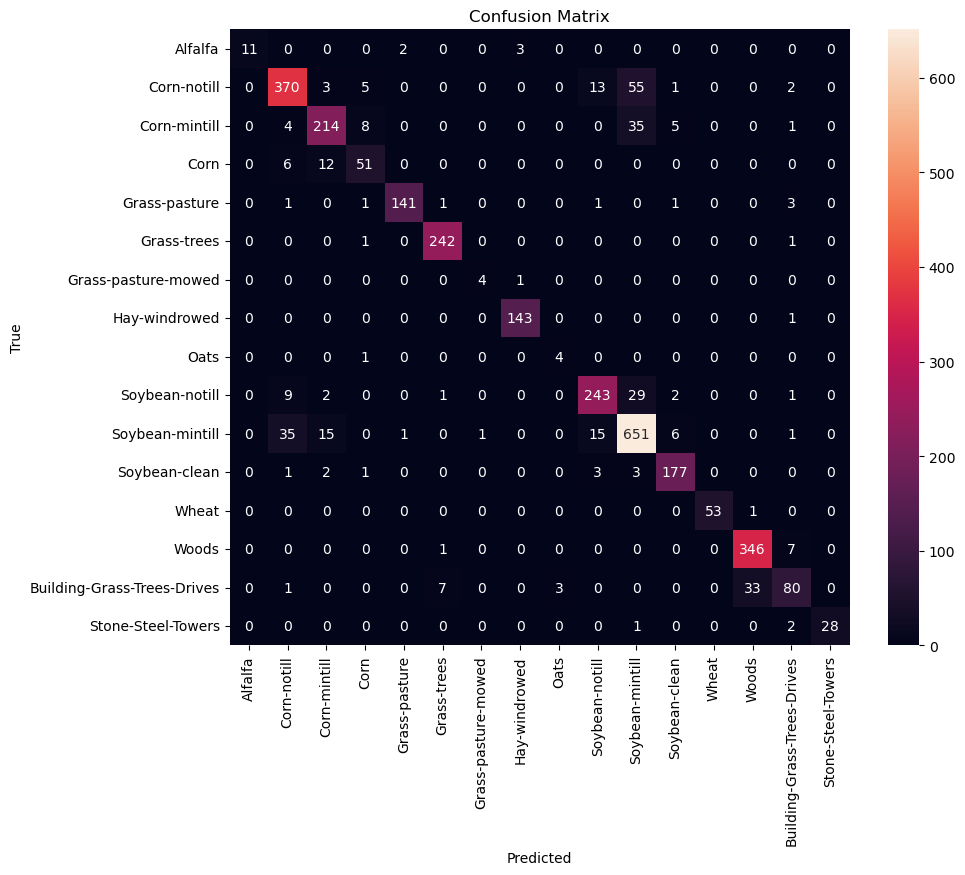

In [52]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill',
'Soybean-mintill','Soybean-clean','Wheat','Woods','Building-Grass-Trees-Drives','Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.1)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------End-----------------------------------------

(0.0, 1.0, 0.0, 1.0)

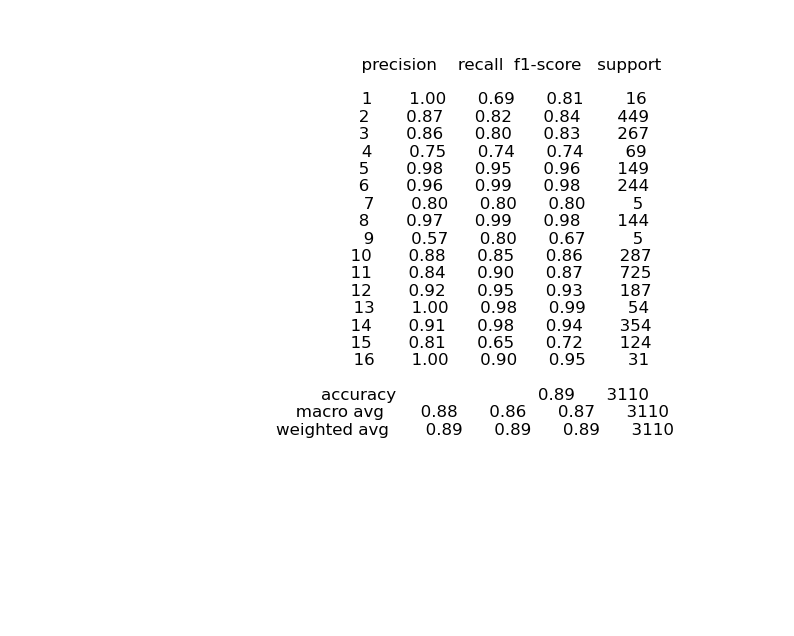

In [64]:
plt.figure(figsize=(10, 8))
plt.text(0.6, 0.6, report, fontsize=12, ha='center', va='center')
plt.axis('off')

In [53]:
sorted(y_test.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [54]:
y_test.value_counts()

11    725
2     449
14    354
10    287
3     267
6     244
12    187
5     149
8     144
15    124
4      69
13     54
16     31
1      16
9       5
7       5
Name: target, dtype: int64

In [55]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print(report)

              precision    recall  f1-score   support

           1       1.00      0.69      0.81        16
           2       0.87      0.82      0.84       449
           3       0.86      0.80      0.83       267
           4       0.75      0.74      0.74        69
           5       0.98      0.95      0.96       149
           6       0.96      0.99      0.98       244
           7       0.80      0.80      0.80         5
           8       0.97      0.99      0.98       144
           9       0.57      0.80      0.67         5
          10       0.88      0.85      0.86       287
          11       0.84      0.90      0.87       725
          12       0.92      0.95      0.93       187
          13       1.00      0.98      0.99        54
          14       0.91      0.98      0.94       354
          15       0.81      0.65      0.72       124
          16       1.00      0.90      0.95        31

    accuracy                           0.89      3110
   macro avg       0.88   

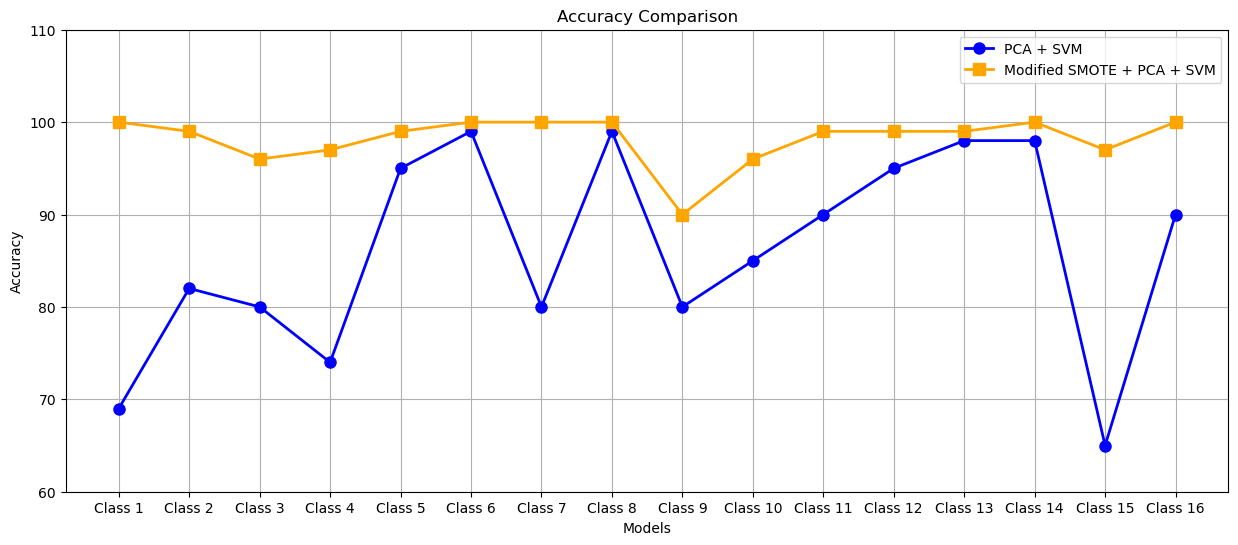

In [3]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10',
 'Class 11','Class 12','Class 13','Class 14','Class 15','Class 16']
accuracies_1 = [69,82,80,74,95,99,80,99,80,85,90,95,98,98,65,90]
accuracies_2 = [100,99,96,97,99,100,100,100,90,96,99,99,99,100,97,100]

# Create a line graph with two lines
plt.figure(figsize=(15, 6))
plt.plot(categories, accuracies_1, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='PCA + SVM')
plt.plot(categories, accuracies_2, marker='s', color='orange', linestyle='-', linewidth=2, markersize=8, label='Modified SMOTE + PCA + SVM')

# Customize the plot
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(60, 110)

# Display the plot
plt.show()


In [56]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")

Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 0.69, Samples = 16
Class 2: Accuracy = 0.82, Samples = 449
Class 3: Accuracy = 0.80, Samples = 267
Class 4: Accuracy = 0.74, Samples = 69
Class 5: Accuracy = 0.95, Samples = 149
Class 6: Accuracy = 0.99, Samples = 244
Class 7: Accuracy = 0.80, Samples = 5
Class 8: Accuracy = 0.99, Samples = 144
Class 9: Accuracy = 0.80, Samples = 5
Class 10: Accuracy = 0.85, Samples = 287
Class 11: Accuracy = 0.90, Samples = 725
Class 12: Accuracy = 0.95, Samples = 187
Class 13: Accuracy = 0.98, Samples = 54
Class 14: Accuracy = 0.98, Samples = 354
Class 15: Accuracy = 0.65, Samples = 124
Class 16: Accuracy = 0.90, Samples = 31


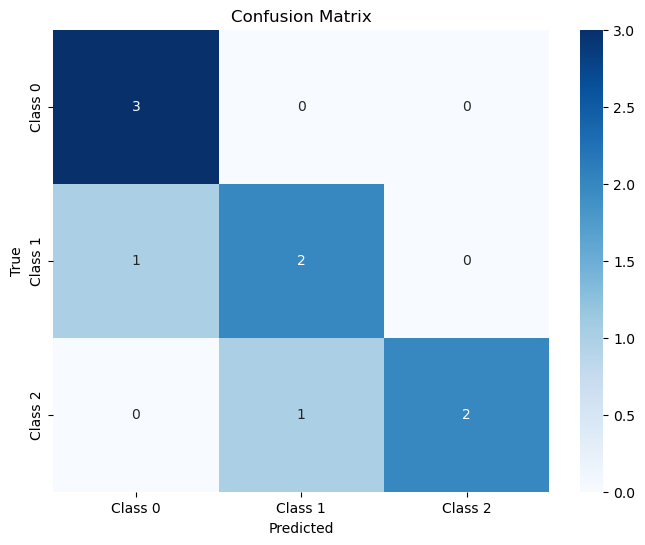

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Replace these with your actual ground truth and predicted labels
true_labels = [0, 1, 2, 0, 1, 2, 2, 0, 1]
predicted_labels = [0, 0, 2, 0, 1, 1, 2, 0, 1]

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
from sklearn.metrics import classification_report, accuracy_score

# Replace these with your actual ground truth and predicted labels
true_labels = [0, 1, 2, 0, 1, 2, 2, 0, 1]
predicted_labels = [0, 0, 2, 0, 1, 1, 2, 0, 1]

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels)

# Print accuracy and classification report
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n')
print(class_report)

Accuracy: 0.78

Classification Report:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.67      0.67      0.67         3
           2       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.81      0.78      0.77         9
weighted avg       0.81      0.78      0.77         9



In [59]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Example ground truth and predicted labels (replace with your own data)
y_true = np.array([1, 0, 2, 1, 1, 0, 2, 2, 0, 2])
y_pred = np.array([1, 0, 2, 1, 0, 1, 2, 2, 0, 2])

# Compute overall accuracy
accuracy = accuracy_score(y_true, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Compute classification report
class_names = ['Class 0', 'Class 1', 'Class 2']  # Replace with your class names
report = classification_report(y_true, y_pred, target_names=class_names)

# Compute per class accuracy
per_class_accuracy = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Display results
print("Overall Accuracy:", accuracy)
# print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)
print("\nPer Class Accuracy:", per_class_accuracy)

Overall Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.67      0.67      0.67         3
     Class 1       0.67      0.67      0.67         3
     Class 2       1.00      1.00      1.00         4

    accuracy                           0.80        10
   macro avg       0.78      0.78      0.78        10
weighted avg       0.80      0.80      0.80        10


Per Class Accuracy: [0.66666667 0.66666667 1.        ]
